In [47]:
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

In [48]:
#Defining characters for all the layouts
characters = {
    # Lowercase letters (unchanged)
    'a': ('a',), 'b': ('b',), 'c': ('c',), 'd': ('d',), 'e': ('e',),
    'f': ('f',), 'g': ('g',), 'h': ('h',), 'i': ('i',), 'j': ('j',),
    'k': ('k',), 'l': ('l',), 'm': ('m',), 'n': ('n',), 'o': ('o',),
    'p': ('p',), 'q': ('q',), 'r': ('r',), 's': ('s',), 't': ('t',),
    'u': ('u',), 'v': ('v',), 'w': ('w',), 'x': ('x',), 'y': ('y',),
    'z': ('z',),
    
    # Uppercase letters (updated)
    'A': ('Shift_R', 'a'), 'B': ('Shift_R', 'b'), 'C': ('Shift_R', 'c'),
    'D': ('Shift_R', 'd'), 'E': ('Shift_R', 'e'), 'F': ('Shift_R', 'f'),
    'G': ('Shift_R', 'g'), 'H': ('Shift_L', 'h'), 'I': ('Shift_L', 'i'),
    'J': ('Shift_L', 'j'), 'K': ('Shift_L', 'k'), 'L': ('Shift_L', 'l'),
    'M': ('Shift_L', 'm'), 'N': ('Shift_L', 'n'), 'O': ('Shift_L', 'o'),
    'P': ('Shift_L', 'p'), 'Q': ('Shift_R', 'q'), 'R': ('Shift_R', 'r'),
    'S': ('Shift_R', 's'), 'T': ('Shift_R', 't'), 'U': ('Shift_L', 'u'),
    'V': ('Shift_R', 'v'), 'W': ('Shift_R', 'w'), 'X': ('Shift_R', 'x'),
    'Y': ('Shift_L', 'y'), 'Z': ('Shift_R', 'z'),
    
    # Numbers and their shifted symbols (updated)
    '1': ('1',), '!': ('Shift_R', '1'),
    '2': ('2',), '@': ('Shift_R', '2'),
    '3': ('3',), '#': ('Shift_R', '3'),
    '4': ('4',), '$': ('Shift_R', '4'),
    '5': ('5',), '%': ('Shift_R', '5'),
    '6': ('6',), '^': ('Shift_L', '6'),
    '7': ('7',), '&': ('Shift_L', '7'),
    '8': ('8',), '*': ('Shift_L', '8'),
    '9': ('9',), '(': ('Shift_L', '9'),
    '0': ('0',), ')': ('Shift_L', '0'),
    

    '`': ('`',), '~': ('Shift_R', '`'),
    '-': ('-',), '_': ('Shift_L', '-'),
    '=': ('=',), '+': ('Shift_L', '='),
    '[': ('[',), '{': ('Shift_L', '['),
    ']': (']',), '}': ('Shift_L', ']'),
    '\\': ('\\',), '|': ('Shift_L', '\\'),
    ';': (';',), ':': ('Shift_L', ';'),
    "'": ("'",), '"': ('Shift_L', "'"),
    ',': (',',), '<': ('Shift_L', ','),
    '.': ('.',), '>': ('Shift_L', '.'),
    '/': ('/',), '?': ('Shift_L', '/'),
    
    ' ': ('Space',),
}

In [49]:
#QWERTY_LAYOUT KEYS DEFINED WITH THIER POSITION AND START LOCATION
keys = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 's'},
    '4': {'pos': (4, 4), 'start': 'd'},
    '5': {'pos': (5, 4), 'start': 'f'},
    '6': {'pos': (6, 4), 'start': 'j'},
    '7': {'pos': (7, 4), 'start': 'j'},
    '8': {'pos': (8, 4), 'start': 'k'},
    '9': {'pos': (9, 4), 'start': 'l'},
    '0': {'pos': (10, 4), 'start': ';'},
    '-': {'pos': (11, 4), 'start': ';'},
    '=': {'pos': (12, 4), 'start': ';'},
    
    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
    'w': {'pos': (2.5, 3), 'start': 's'},
    'e': {'pos': (3.5, 3), 'start': 'd'},
    'r': {'pos': (4.5, 3), 'start': 'f'},
    't': {'pos': (5.5, 3), 'start': 'f'},
    'y': {'pos': (6.5, 3), 'start': 'j'},
    'u': {'pos': (7.5, 3), 'start': 'j'},
    'i': {'pos': (8.5, 3), 'start': 'k'},
    'o': {'pos': (9.5, 3), 'start': 'l'},
    'p': {'pos': (10.5, 3), 'start': ';'},
    '[': {'pos': (11.5, 3), 'start': ';'},
    ']': {'pos': (12.5, 3), 'start': ';'},
    '\\': {'pos': (13.5, 3), 'start': ';'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    's': {'pos': (2.75, 2), 'start': 's'},
    'd': {'pos': (3.75, 2), 'start': 'd'},
    'f': {'pos': (4.75, 2), 'start': 'f'},
    'g': {'pos': (5.75, 2), 'start': 'f'},
    'h': {'pos': (6.75, 2), 'start': 'j'},
    'j': {'pos': (7.75, 2), 'start': 'j'},
    'k': {'pos': (8.75, 2), 'start': 'k'},
    'l': {'pos': (9.75, 2), 'start': 'l'},
    ';': {'pos': (10.75, 2), 'start': ';'},
    "'": {'pos': (11.75, 2), 'start': ';'},
    
    # Bottom letter row
    'z': {'pos': (2.25, 1), 'start': 'a'},
    'x': {'pos': (3.25, 1), 'start': 's'},
    'c': {'pos': (4.25, 1), 'start': 'd'},
    'v': {'pos': (5.25, 1), 'start': 'f'},
    'b': {'pos': (6.25, 1), 'start': 'f'},
    'n': {'pos': (7.25, 1), 'start': 'j'},
    'm': {'pos': (8.25, 1), 'start': 'j'},
    ',': {'pos': (9.25, 1), 'start': 'k'},
    '.': {'pos': (10.25, 1), 'start': 'l'},
    '/': {'pos': (11.25, 1), 'start': ';'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.25, 1), 'start': ';'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (3.25, 0), 'start': 'a'},
    'Backspace': {'pos': (13,4), 'start': ';'},
    'Tab': {'pos': (0,3), 'start': 'a'},
    'CapsLk': {'pos': (0,2), 'start': 'a'},
    'Enter': {'pos': (12.75,2), 'start': ';'},
    'Space': {'pos': (4.25, 0), 'start': 'f'},
    'Alt_R': {'pos': (9.25, 0), 'start': 'j'},
    'Ctrl_R': {'pos': (10.25, 0), 'start': ';'},
}


In [50]:
#WORKMAN_LAYOUT KEYS DEFINED
keys1 = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 's'},
    '4': {'pos': (4, 4), 'start': 'h'},
    '5': {'pos': (5, 4), 'start': 't'},
    '6': {'pos': (6, 4), 'start': 'n'},
    '7': {'pos': (7, 4), 'start': 'n'},
    '8': {'pos': (8, 4), 'start': 'e'},
    '9': {'pos': (9, 4), 'start': 'o'},
    '0': {'pos': (10, 4), 'start': 'i'},
    '-': {'pos': (11, 4), 'start': 'i'},
    '=': {'pos': (12, 4), 'start': 'i'},
    
    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
    'd': {'pos': (2.5, 3), 'start': 's'},
    'r': {'pos': (3.5, 3), 'start': 'h'},
    'w': {'pos': (4.5, 3), 'start': 't'},
    'b': {'pos': (5.5, 3), 'start': 't'},
    'j': {'pos': (6.5, 3), 'start': 'n'},
    'f': {'pos': (7.5, 3), 'start': 'n'},
    'u': {'pos': (8.5, 3), 'start': 'e'},
    'p': {'pos': (9.5, 3), 'start': 'o'},
    ';': {'pos': (10.5, 3), 'start': 'i'},
    '[': {'pos': (11.5, 3), 'start': 'i'},
    ']': {'pos': (12.5, 3), 'start': 'i'},
    '\\': {'pos': (13.5, 3), 'start': 'i'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    's': {'pos': (2.75, 2), 'start': 's'},
    'h': {'pos': (3.75, 2), 'start': 'h'},
    't': {'pos': (4.75, 2), 'start': 't'},
    'g': {'pos': (5.75, 2), 'start': 'g'},
    'y': {'pos': (6.75, 2), 'start': 'y'},
    'n': {'pos': (7.75, 2), 'start': 'n'},
    'e': {'pos': (8.75, 2), 'start': 'e'},
    'o': {'pos': (9.75, 2), 'start': 'o'},
    'i': {'pos': (10.75, 2), 'start': 'i'},
    "'": {'pos': (11.75, 2), 'start': "'"},
    
    # Bottom letter row
    'z': {'pos': (2.25, 1), 'start': 'a'},
    'x': {'pos': (3.25, 1), 'start': 's'},
    'm': {'pos': (4.25, 1), 'start': 'h'},
    'c': {'pos': (5.25, 1), 'start': 't'},
    'v': {'pos': (6.25, 1), 'start': 't'},
    'k': {'pos': (7.25, 1), 'start': 'n'},
    'l': {'pos': (8.25, 1), 'start': 'n'},
    ',': {'pos': (9.25, 1), 'start': 'e'},
    '.': {'pos': (10.25, 1), 'start': 'o'},
    '/': {'pos': (11.25, 1), 'start': 'i'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.25, 1), 'start': 'i'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (3.25, 0), 'start': 'a'},
    'Backspace': {'pos': (13,4), 'start': 'i'},
    'Tab': {'pos': (0,3), 'start': 'a'},
    'CapsLk': {'pos': (0,2), 'start': 'a'},
    'Enter': {'pos': (12.75,2), 'start': 'i'},
    'Space': {'pos': (4.25, 0), 'start': 't'},
    'Alt_R': {'pos': (9.25, 0), 'start': 'n'},
    'Ctrl_R': {'pos': (10.25, 0), 'start': 'i'},
}


In [51]:
#COLEMAK_LAYOUT KEYS DEFINED
keys2 = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 'r'},
    '4': {'pos': (4, 4), 'start': 's'},
    '5': {'pos': (5, 4), 'start': 't'},
    '6': {'pos': (6, 4), 'start': 'n'},
    '7': {'pos': (7, 4), 'start': 'n'},
    '8': {'pos': (8, 4), 'start': 'e'},
    '9': {'pos': (9, 4), 'start': 'i'},
    '0': {'pos': (10, 4), 'start': 'o'},
    '-': {'pos': (11, 4), 'start': 'o'},
    '=': {'pos': (12, 4), 'start': 'o'},
    
    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
    'w': {'pos': (2.5, 3), 'start': 'r'},
    'f': {'pos': (3.5, 3), 'start': 's'},
    'p': {'pos': (4.5, 3), 'start': 't'},
    'g': {'pos': (5.5, 3), 'start': 't'},
    'j': {'pos': (6.5, 3), 'start': 'n'},
    'l': {'pos': (7.5, 3), 'start': 'n'},
    'u': {'pos': (8.5, 3), 'start': 'e'},
    'y': {'pos': (9.5, 3), 'start': 'i'},
    ';': {'pos': (10.5, 3), 'start': 'o'},
    '[': {'pos': (11.5, 3), 'start': 'o'},
    ']': {'pos': (12.5, 3), 'start': 'o'},
    '\\': {'pos': (13.5, 3), 'start': 'o'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    'r': {'pos': (2.75, 2), 'start': 'r'},
    's': {'pos': (3.75, 2), 'start': 's'},
    't': {'pos': (4.75, 2), 'start': 't'},
    'd': {'pos': (5.75, 2), 'start': 'd'},
    'h': {'pos': (6.75, 2), 'start': 'h'},
    'n': {'pos': (7.75, 2), 'start': 'n'},
    'e': {'pos': (8.75, 2), 'start': 'e'},
    'o': {'pos': (9.75, 2), 'start': 'o'},
    'i': {'pos': (10.75, 2), 'start': 'i'},
    "'": {'pos': (11.75, 2), 'start': "'"},
    
    # Bottom letter row
    'z': {'pos': (2.25, 1), 'start': 'a'},
    'x': {'pos': (3.25, 1), 'start': 'r'},
    'c': {'pos': (4.25, 1), 'start': 's'},
    'v': {'pos': (5.25, 1), 'start': 't'},
    'b': {'pos': (6.25, 1), 'start': 't'},
    'k': {'pos': (7.25, 1), 'start': 'n'},
    'm': {'pos': (8.25, 1), 'start': 'n'},
    '.': {'pos': (9.25, 1), 'start': 'e'},
    ',': {'pos': (10.25, 1), 'start': 'i'},
    '/': {'pos': (11.25, 1), 'start': 'o'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.25, 1), 'start': 'o'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (3.25, 0), 'start': 'a'},
    'Backspace': {'pos': (13,4), 'start': 'o'},
    'Tab': {'pos': (0,3), 'start': 'a'},
    'CapsLk': {'pos': (0,2), 'start': 'a'},
    'Enter': {'pos': (12.75,2), 'start': 'o'},
    'Space': {'pos': (4.25, 0), 'start': 't'},
    'Alt_R': {'pos': (9.25, 0), 'start': 'n'},
    'Ctrl_R': {'pos': (10.25, 0), 'start': 'o'},
}


In [52]:
#DVORAK_LAYOUT KEYS DEFINED
keys3 = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 'o'},
    '4': {'pos': (4, 4), 'start': 'e'},
    '5': {'pos': (5, 4), 'start': 'u'},
    '6': {'pos': (6, 4), 'start': 'h'},
    '7': {'pos': (7, 4), 'start': 'h'},
    '8': {'pos': (8, 4), 'start': 't'},
    '9': {'pos': (9, 4), 'start': 'n'},
    '0': {'pos': (10, 4), 'start': 's'},
    '[': {'pos': (11, 4), 'start': 's'},
    ']': {'pos': (12, 4), 'start': 's'},
    
    # Top letter row
    "'": {'pos': (1.5, 3), 'start': 'a'},
    ',': {'pos': (2.5, 3), 'start': 'o'},
    '.': {'pos': (3.5, 3), 'start': 'e'},
    'p': {'pos': (4.5, 3), 'start': 'u'},
    'y': {'pos': (5.5, 3), 'start': 'u'},
    'f': {'pos': (6.5, 3), 'start': 'h'},
    'g': {'pos': (7.5, 3), 'start': 'h'},
    'c': {'pos': (8.5, 3), 'start': 't'},
    'r': {'pos': (9.5, 3), 'start': 'n'},
    'l': {'pos': (10.5, 3), 'start': 's'},
    '/': {'pos': (11.5, 3), 'start': 's'},
    '=': {'pos': (12.5, 3), 'start': 's'},
    '\\': {'pos': (13.5, 3), 'start': 's'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    'o': {'pos': (2.75, 2), 'start': 'o'},
    'e': {'pos': (3.75, 2), 'start': 'e'},
    'u': {'pos': (4.75, 2), 'start': 'u'},
    'i': {'pos': (5.75, 2), 'start': 'i'},
    'd': {'pos': (6.75, 2), 'start': 'd'},
    'h': {'pos': (7.75, 2), 'start': 'h'},
    't': {'pos': (8.75, 2), 'start': 't'},
    'n': {'pos': (9.75, 2), 'start': 'n'},
    's': {'pos': (10.75, 2), 'start': 's'},
    '-': {'pos': (11.75, 2), 'start': '-'},
    
    # Bottom letter row
    ';': {'pos': (2.25, 1), 'start': 'a'},
    'q': {'pos': (3.25, 1), 'start': 'o'},
    'j': {'pos': (4.25, 1), 'start': 'e'},
    'k': {'pos': (5.25, 1), 'start': 'u'},
    'x': {'pos': (6.25, 1), 'start': 'u'},
    'b': {'pos': (7.25, 1), 'start': 'h'},
    'm': {'pos': (8.25, 1), 'start': 'h'},
    'w': {'pos': (9.25, 1), 'start': 't'},
    'v': {'pos': (10.25, 1), 'start': 'n'},
    'z': {'pos': (11.25, 1), 'start': 's'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.25, 1), 'start': 's'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (3.25, 0), 'start': 'a'},
    'Backspace': {'pos': (13,4), 'start': 's'},
    'Tab': {'pos': (0,3), 'start': 'a'},
    'CapsLk': {'pos': (0,2), 'start': 'a'},
    'Enter': {'pos': (12.75,2), 'start': 's'},
    'Space': {'pos': (4.25, 0), 'start': 'u'},
    'Alt_R': {'pos': (9.25, 0), 'start': 'h'},
    'Ctrl_R': {'pos': (10.25, 0), 'start': 's'},
}


In [53]:
#CALCULATING THE TOTAL DISTANCE PLUS KEY USAGE
def calc_total_distance(string_input, layout):
    total_distance = 0
    key_usage = {}

    def calc_distance(c, layout):
        char = layout['characters'][c]
        ini_key = layout['keys'][char[0]]['start']
        ini_loc = layout['keys'][ini_key]['pos']
        location = layout['keys'][char[0]]['pos']
        dist1 = math.sqrt((ini_loc[0] - location[0]) ** 2 + (ini_loc[1] - location[1]) ** 2)
        
        if len(char) == 1:
            return dist1
        
        elif len(char) == 2:
            # keyusage for shift keys 
            
            if char[0] == 'Shift_L':
                Shift_L = char[0]
                key_usage[Shift_L] = key_usage.get(Shift_L, 0) + 1  
            elif char[0] == 'Shift_R':
                Shift_R = char[0]
                key_usage[Shift_R] = key_usage.get(Shift_R, 0) + 1
            ini_key2 = layout['keys'][char[1]]['start']
            ini_loc2 = layout['keys'][ini_key2]['pos']
            location2 = layout['keys'][char[1]]['pos']
            dist2 = math.sqrt((ini_loc2[0] - location2[0]) ** 2 + (ini_loc2[1] - location2[1]) ** 2) 
            
            return dist1 + dist2

    for char in string_input:
        if char in layout['characters']: 
            key_usage[char] = key_usage.get(char, 0) + 1
            total_distance += calc_distance(char, layout)
            
    return total_distance, key_usage


In [54]:
# Function to generate a heatmap visualization of key usage

def generate_heatmap(key_usage, layout):
    # Create a figure for plotting
    fig, ax = plt.subplots(figsize=(15, 6))

    # Set up the plot limits to cover the entire keyboard layout
    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 6)

    # Get the maximum usage value for normalization
    max_usage = max(key_usage.values()) if max(key_usage.values()) > 0 else 1

    # Create a normalization object for the color mapping
    norm = mpl.colors.Normalize(vmin=0, vmax=max_usage)

    # Create a colormap object
    cmap = plt.cm.Reds

    # Create a ScalarMappable object to handle the color mapping
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Plot the keys with colors based on usage
    for key, properties in layout['keys'].items():
        if key == 'Space':
            key = ' '
        position = properties['pos']
        usage_count = key_usage.get(key, 0)  # Default to 0 if key not in usage data
        heat = usage_count / max_usage if max_usage > 0 else 0

        # Check for special keys and adjust width accordingly
        if key == ' ':
            rect = plt.Rectangle(position, 5, 1, color=cmap(heat), ec='black')  # Make Space key wider
            ax.text(position[0] + 2.5, position[1] + 0.5, 'Space', ha='center', va='center', fontsize=12)
        elif key in ['Backspace', 'Enter', 'Shift_L', 'Shift_R', 'CapsLk', 'Tab']:
            width = 1.5 if key == 'Backspace' or key == 'Tab' else 1.75 if key == 'Enter' else 1.75 if key == 'CapsLk' else 2.25
            rect = plt.Rectangle(position, width, 1, color=cmap(heat), ec='black')
            ax.text(position[0] + width / 2, position[1] + 0.5, key, ha='center', va='center', fontsize=12)
        else:
            rect = plt.Rectangle(position, 1, 1, color=cmap(heat), ec='black')
            ax.text(position[0] + 0.5, position[1] + 0.5, key, ha='center', va='center', fontsize=12)

        ax.add_patch(rect)

    # Add the color bar
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Key Usage')

    # Set title and labels
    plt.title('Keyboard Heatmap of Key Usage')
    plt.show()

In [55]:
# Defining layouts
qwerty_layout = {
    'keys': keys,
    'characters': characters
}

workman_layout = {
    'keys': keys1,
    'characters': characters
}

colemak_layout = {
    'keys': keys2,
    'characters': characters
}

dvorak_layout = {
    'keys': keys3,
    'characters': characters
}

In [56]:
# Example usage:

pressed_keys = "BJg478q yqg 7o837 8gq87 g *&G*Ww87B3QY  UGDEUYGDAUSFUhdbfvyurey bbrefzxcvbnmjhgfdssertyuio34567890-['/.,bvcxsw45678io"
compare = {}

Total distance traveled: 200.15


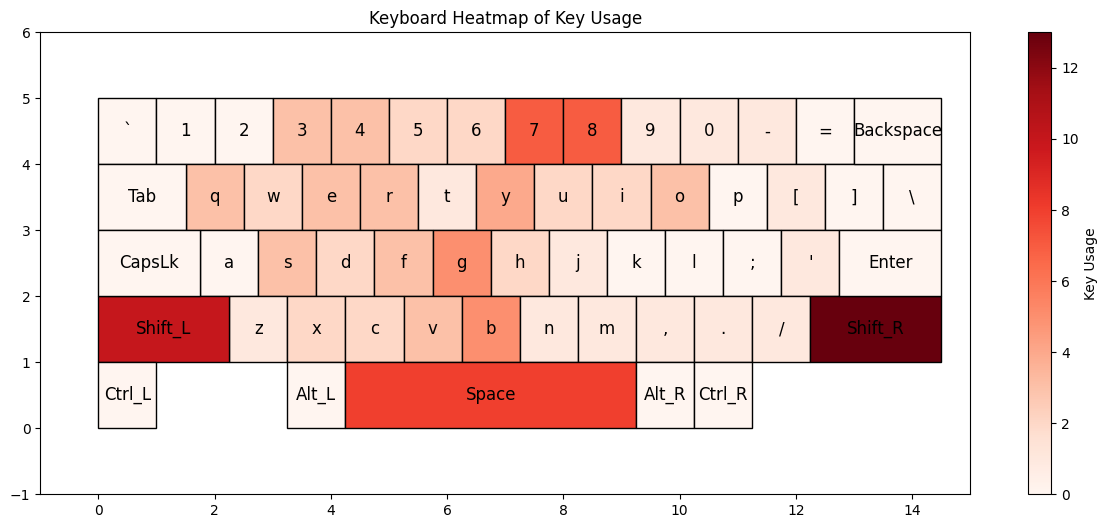

In [57]:
#QWERTY_LAYOUT
total_distance, key_usage = calc_total_distance(pressed_keys, qwerty_layout)
print(f"Total distance traveled: {total_distance:.2f}")
generate_heatmap(key_usage, qwerty_layout)

compare['qwerty_layout'] = total_distance

Total distance traveled: 177.53


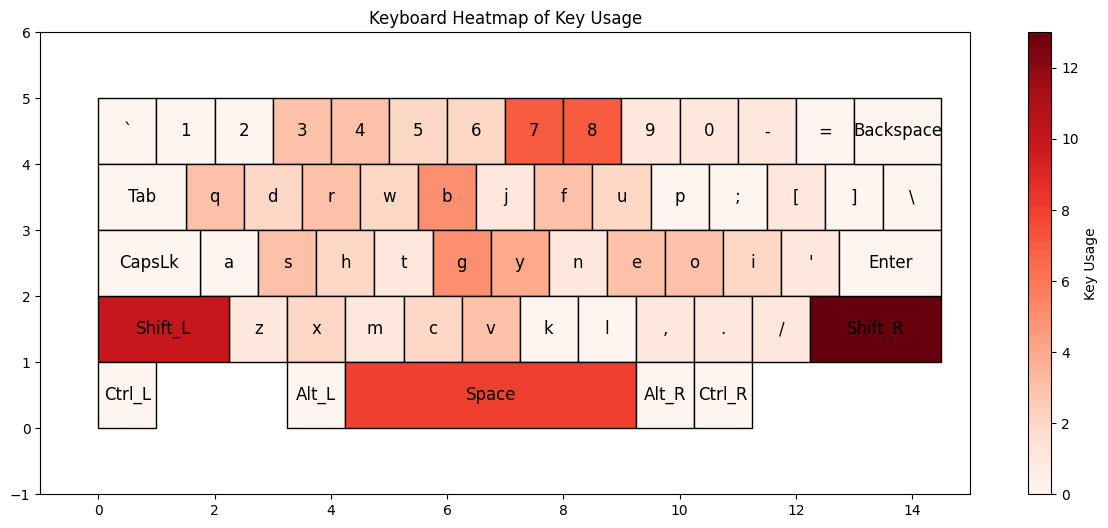

In [58]:
#WORKMAN_LAYOUT
total_distance, key_usage = calc_total_distance(pressed_keys, workman_layout)
print(f"Total distance traveled: {total_distance:.2f}")
compare['workman_layout'] = total_distance
generate_heatmap(key_usage, workman_layout)

Total distance traveled: 205.50


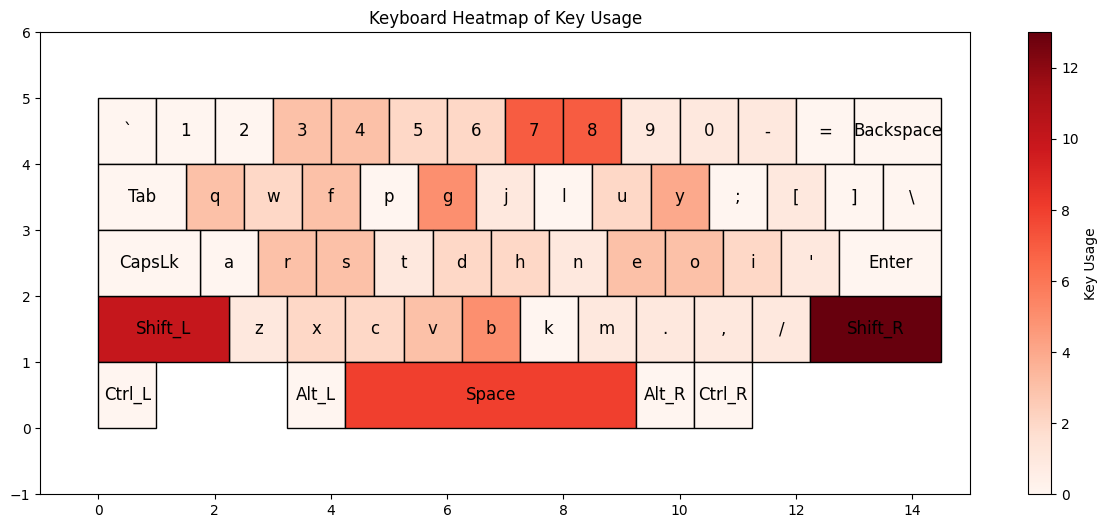

In [59]:
#COLEMAK_LAYOUT
total_distance, key_usage = calc_total_distance(pressed_keys, colemak_layout)
print(f"Total distance traveled: {total_distance:.2f}")
compare['colemak_layout'] = total_distance
generate_heatmap(key_usage, colemak_layout)

Total distance traveled: 182.85


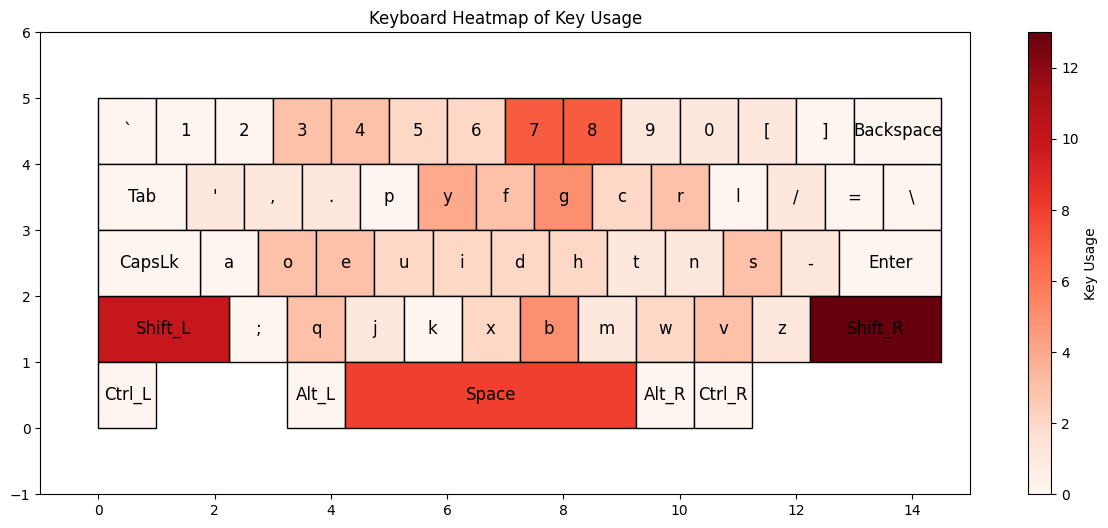

In [60]:
#DVORAK_LAYOUT
total_distance, key_usage = calc_total_distance(pressed_keys, dvorak_layout)
print(f"Total distance traveled: {total_distance:.2f}")
compare['dvorak_layout'] = total_distance
generate_heatmap(key_usage, dvorak_layout)

In [61]:
#Funtion to find the most efficient one
min_layout = min(compare, key=compare.get)
min_distance = compare[min_layout]

print(f"The most efficient layout for the given set of words is '{min_layout}' with a travel distance of {min_distance:.2f} units.")

The most efficient layout for the given set of words is 'workman_layout' with a travel distance of 177.53 units.
